

# 📊✨ **Customer Churn Prediction using Machine Learning**



## 🛠️ **1. Importing Libraries**

- 📚 Importing all necessary libraries for:
  - Data Manipulation (`pandas`, `numpy`)
  - Data Visualization (`matplotlib`, `seaborn`)
  - Model Building (`sklearn`)

In [201]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pickle

## 🗃️ **2. Loading the Dataset**


- 🔍 Initial exploration of the dataset (rows, columns, datatypes).

In [202]:
df=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [203]:
df.shape

(7043, 21)

In [204]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [206]:
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [207]:
df = df.drop(columns=["customerID"])

In [208]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [209]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [210]:
print (df["gender"].unique())

['Female' 'Male']


In [211]:
print(df["SeniorCitizen"].unique())

[0 1]


In [212]:
# printing the unique values in all the columns

numerical_features_list = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in df.columns:
  if col not in numerical_features_list:
    print(col, df[col].unique())
    print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [213]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [214]:
df["TotalCharges"]=df["TotalCharges"].replace({" ":"0.0"})

In [215]:
df["TotalCharges"]=df["TotalCharges"].astype('float')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


 **Insights**
 1. Customer ID removed as it is not required for modelling
 2. No missing values in the Dataset
 3. Missing values in the Total Charges column were replacedd ith 0
 4. Class imabalnce identified in the target

**EDA - Exploratory Data Analysis**

In [217]:
df.shape

(7043, 20)

In [218]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [219]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [220]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [221]:
def plot_histogram(df,column_name):
  plt.figure(figsize=(8,6))
  sns.histplot(df[column_name],kde=True)
  plt.title(f"Distribution of {column_name}")
  #calculate the mean and median values of the columns
  col_mean=df[column_name].mean()
  col_median=df[column_name].median()
  #add vertical lines for mean and median
  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="-",label="Median")
  plt.legend()
  plt.show()

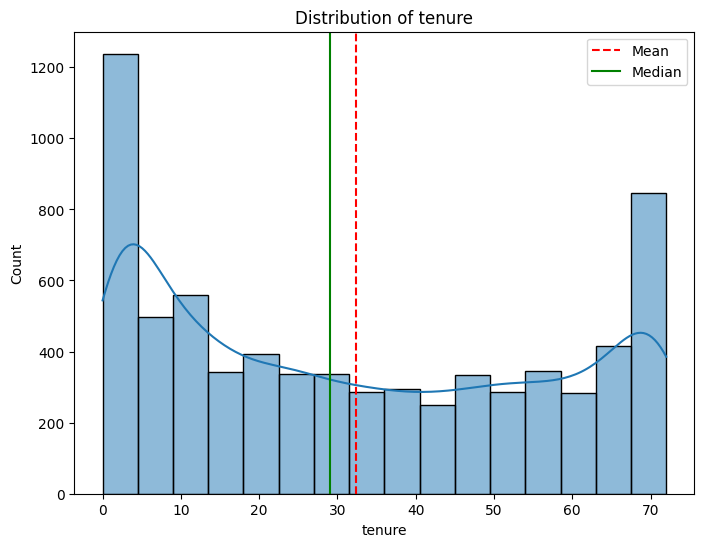

In [222]:
plot_histogram(df,"tenure")

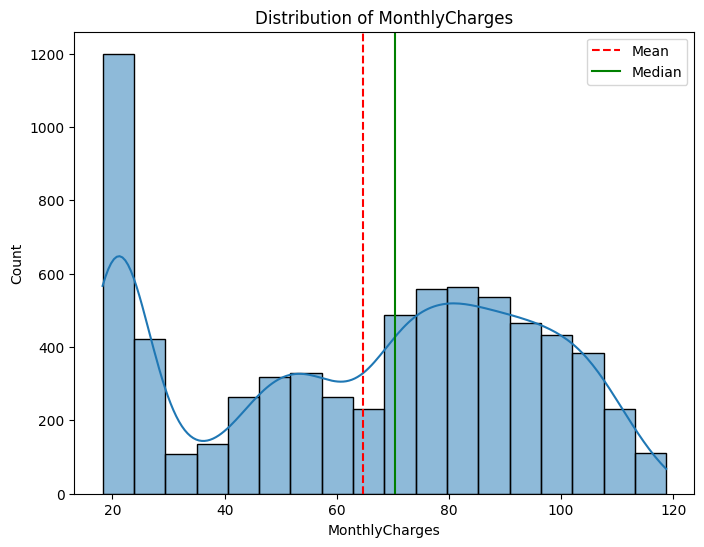

In [223]:
plot_histogram(df,"MonthlyCharges")

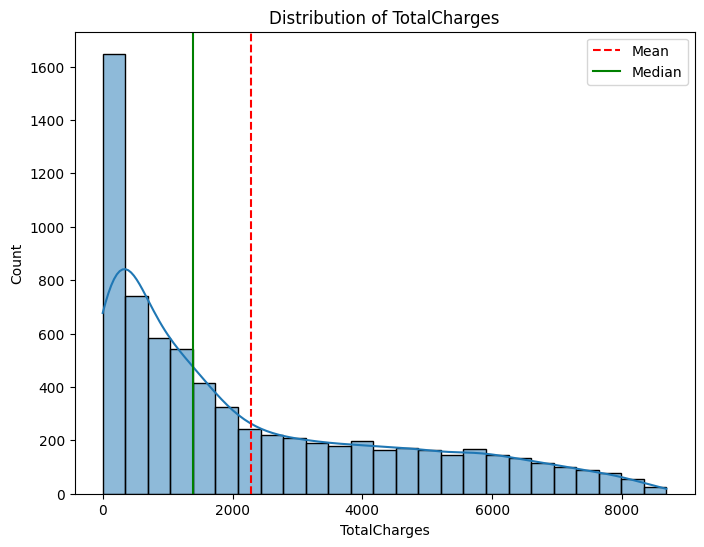

In [224]:
plot_histogram(df,"TotalCharges")

**BOX PLOT for numerical features**

In [225]:
def plot_boxplot(df,column_name):
  plt.figure(figsize=(8,5))
  sns.boxplot(x=df[column_name])
  plt.title(f"Distribution of {column_name}")
  plt.show()

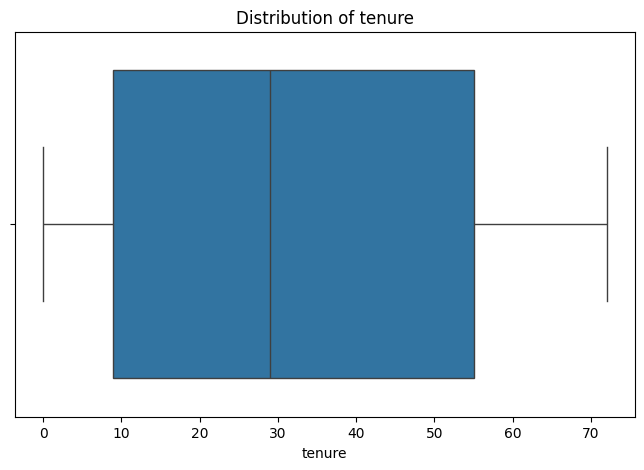

In [226]:
plot_boxplot(df,"tenure")

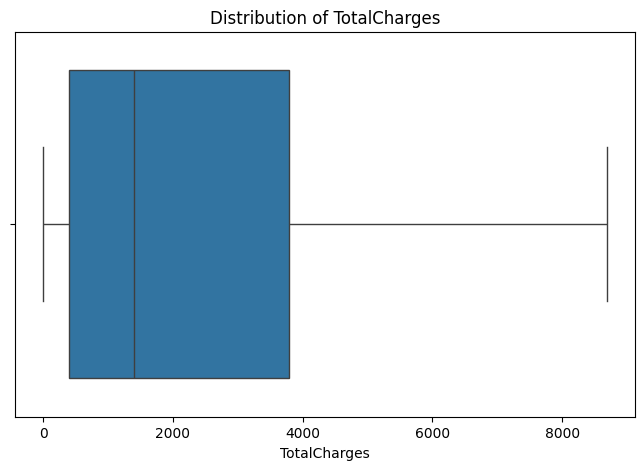

In [227]:
plot_boxplot(df, "TotalCharges")

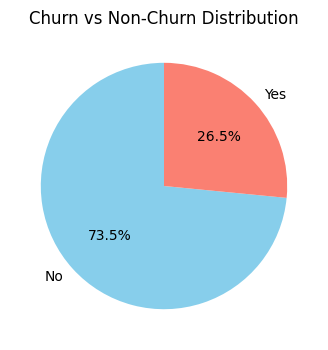

In [228]:
plt.figure(figsize=(6,4))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Churn vs Non-Churn Distribution')
plt.ylabel('')
plt.show()

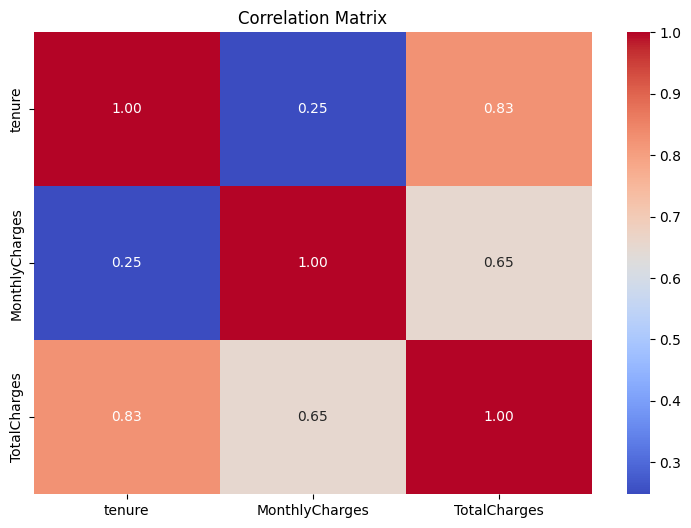

In [229]:
#correlation matrix- heatmap
plt.figure(figsize=(9,6))
sns.heatmap(df[["tenure","MonthlyCharges","TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

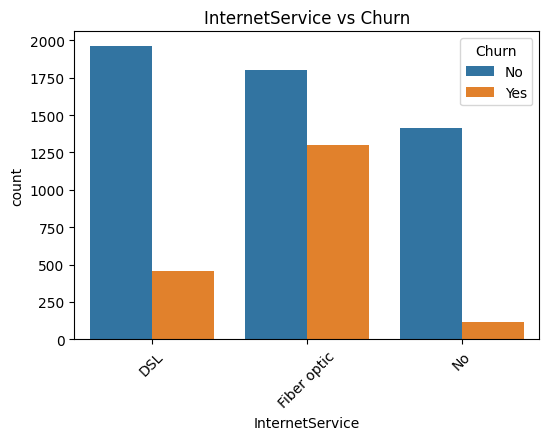

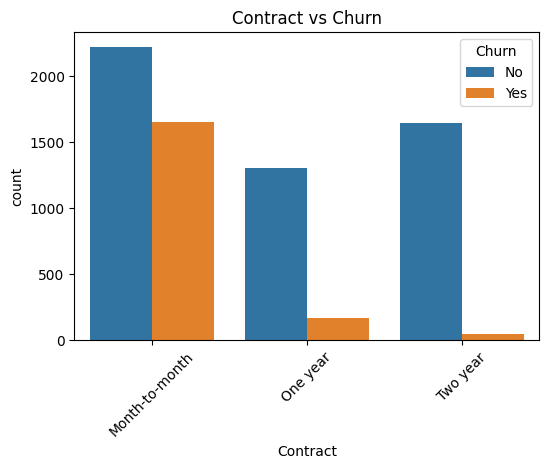

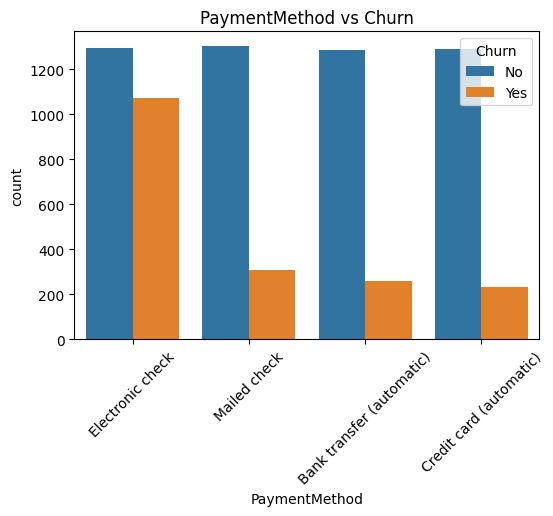

In [230]:
# Important Categorical Columns - Barplots
categorical_cols = ['InternetService', 'Contract', 'PaymentMethod']  # Example columns
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.show()

In [231]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Countplot for categorical columns**

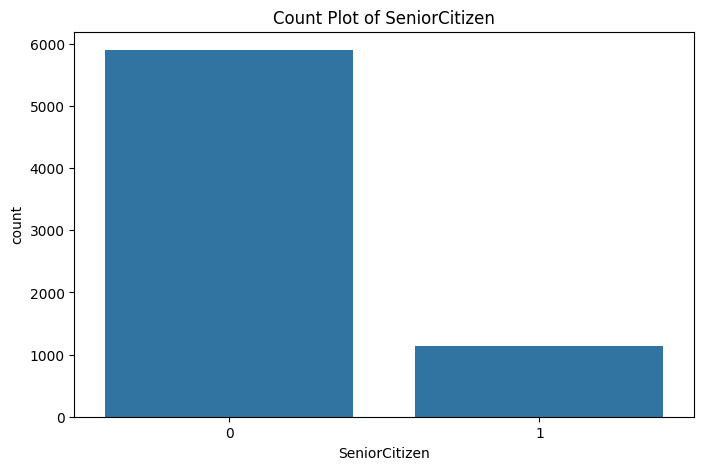

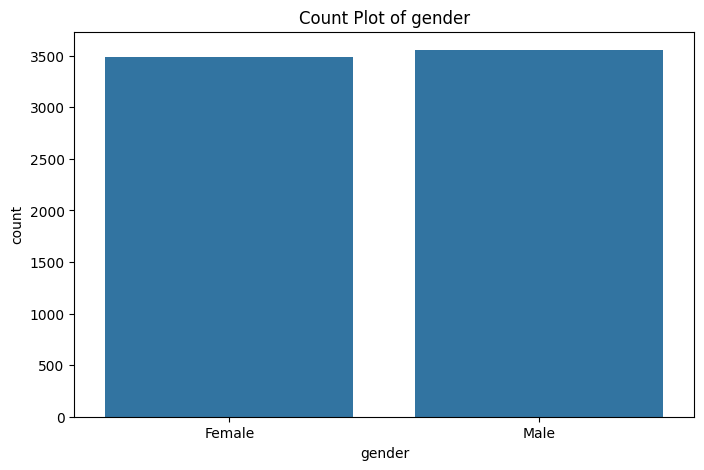

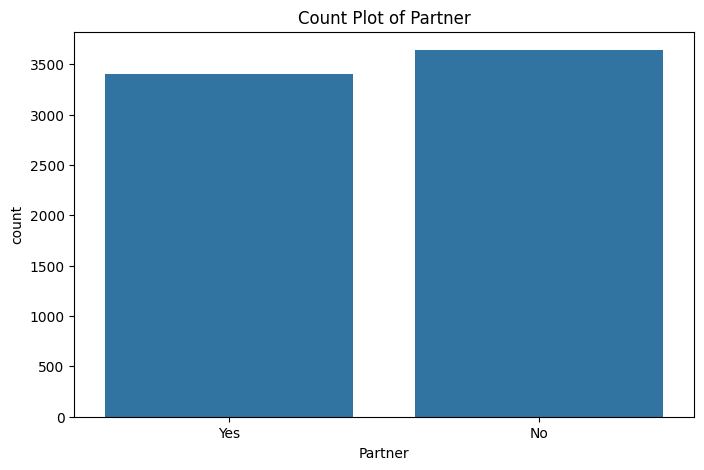

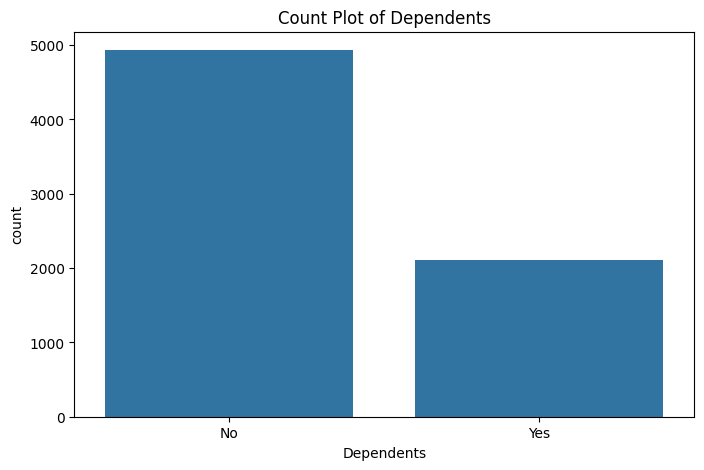

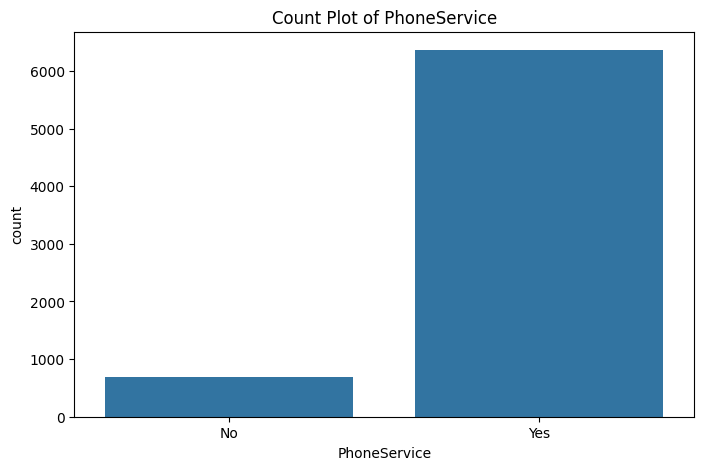

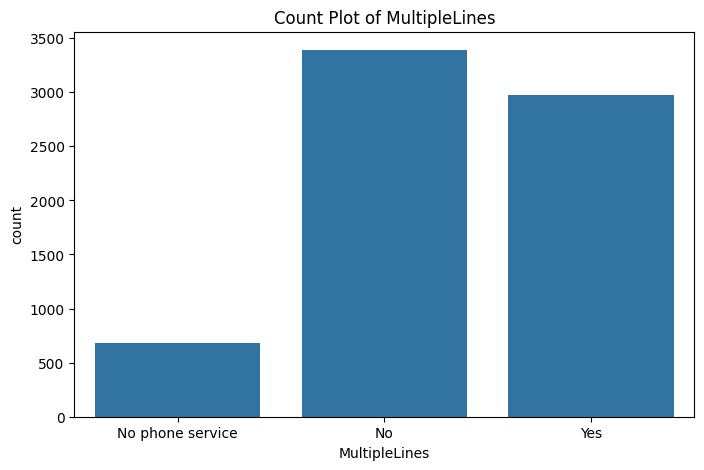

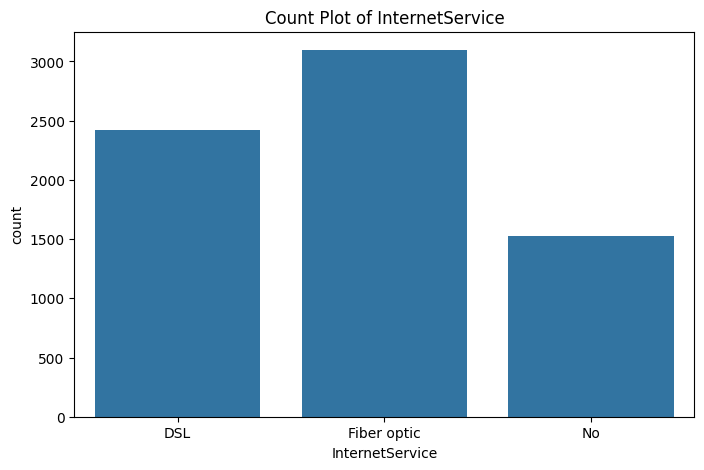

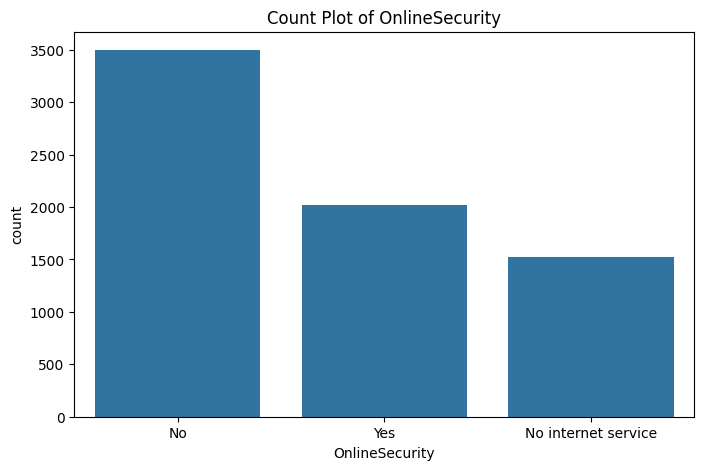

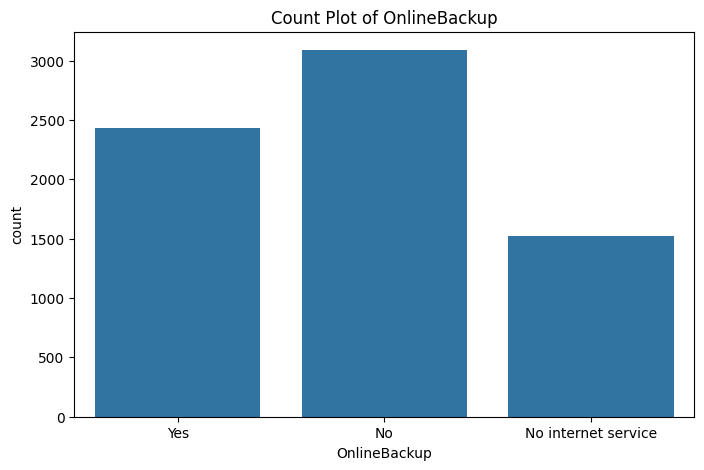

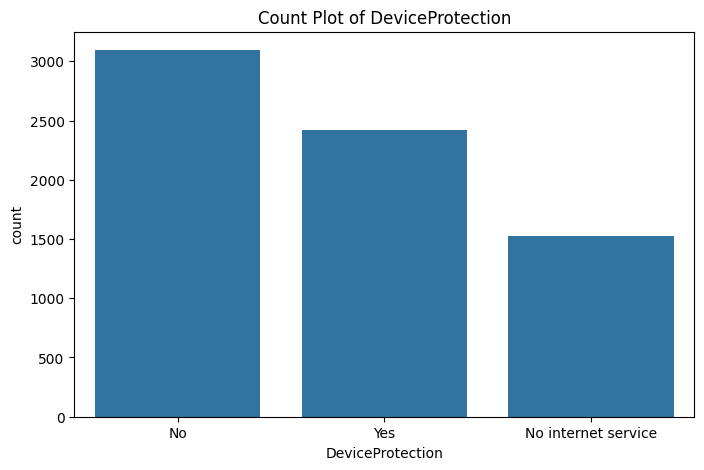

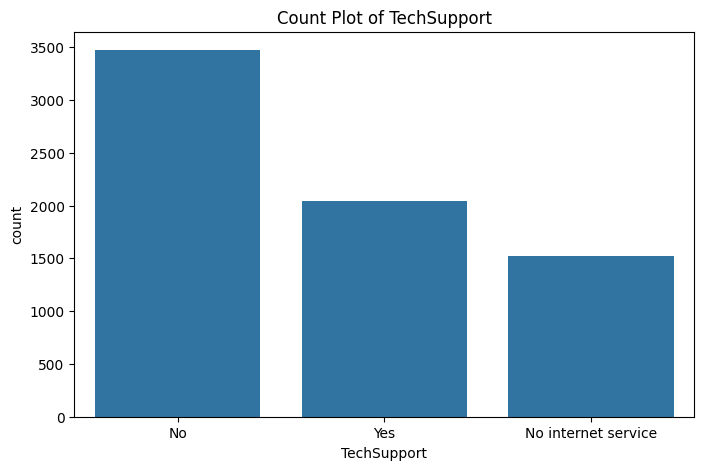

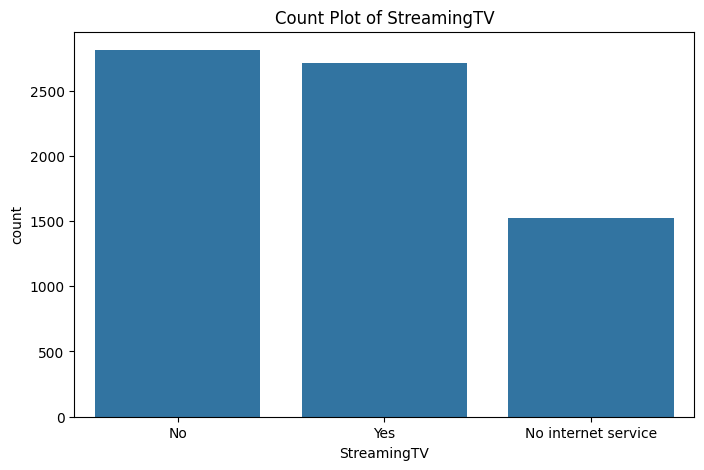

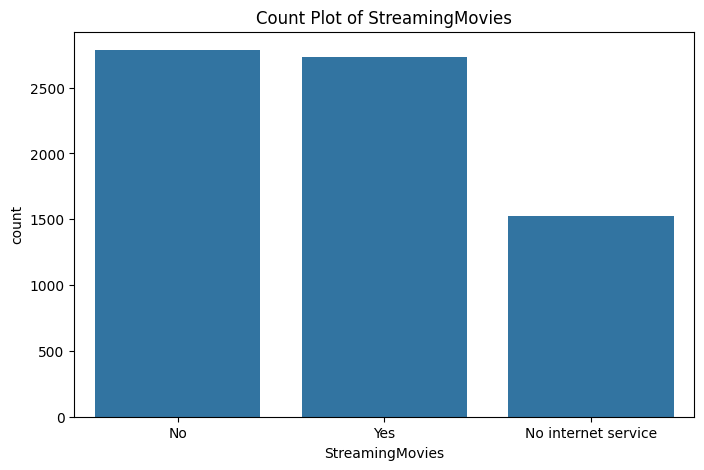

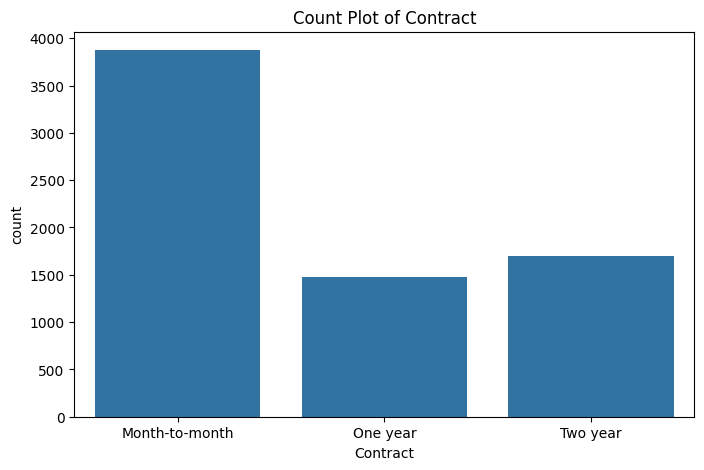

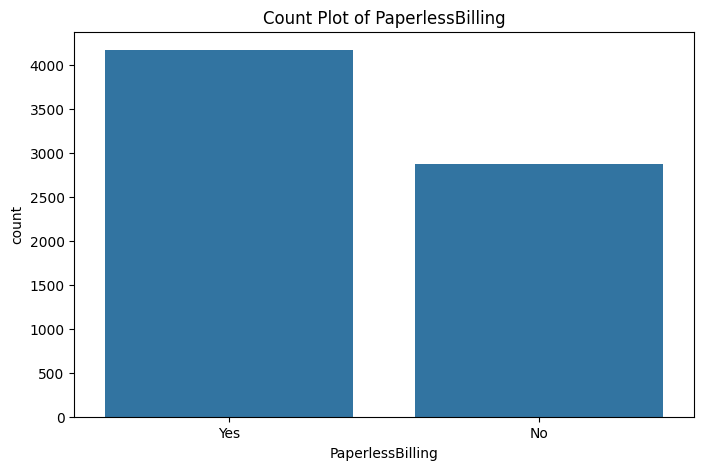

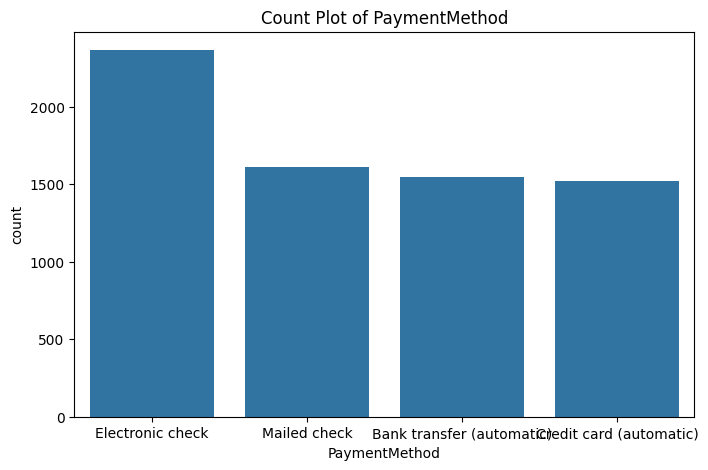

In [239]:
object_cols= df.select_dtypes(include="object").columns.to_list()
object_cols = ["SeniorCitizen"]+object_cols

for col in object_cols:
  plt.figure(figsize=(8,5))
  sns.countplot(x=df[col])
  plt.title(f"Count Plot of {col}")
  plt.show()



## 🧹 **3. Data Preprocessing**

- 🧽 Handling missing values (if present).
- 🔤 Encoding categorical variables to numerical formats (Label Encoding/One-Hot Encoding).
- 🧮 Feature Scaling (if required to normalize the data).

In [240]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [241]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

In [242]:
print = __builtins__.print
print(df["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [243]:
# identifying columns with object data type
object_columns = df.select_dtypes(include="object").columns

In [244]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [245]:
import pickle
from sklearn.preprocessing import LabelEncoder

# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)
# Fill missing values
df.fillna(df.median(), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)

In [246]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [247]:
# Load the saved encoders from the pickle file
with open('encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)


In [248]:
from google.colab import files

# Download the saved pickle file
files.download('encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [249]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [250]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## 🧩 **4. Splitting Features and Target**

- 📈 Independent Variables (X) and 📉 Dependent Variable (y = `Churn`) separated.
- ✂️ Splitting the dataset into:
  - 80% for Training
  - 20% for Testing
  using **train_test_split**.


In [251]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [252]:
# splitting the features and target
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
from imblearn.over_sampling import SMOTE


# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


## 🌳 **5. Random Forest Classifier with Hyperparameter Tuning**

- 🧠 Using **GridSearchCV** to perform exhaustive search over specified hyperparameter values.
- 🔧 Hyperparameters tuned:
  - `n_estimators` (number of trees)
  - `max_depth` (depth of trees)
  - `min_samples_split` (minimum samples to split a node)
  - `min_samples_leaf` (minimum samples in a leaf node)
  - `bootstrap` (sampling technique)


In [255]:
# Random Forest with Hyperparameter Tuning
rfc = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

best_model = grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


## 🥇 **6. Best Parameters Found**

- 🏆 Displaying the **best combination of hyperparameters** found through **GridSearchCV** to maximize model performance.
## 📊Model Evaluation

- 🧾 Predicting on the Test set and calculating:
  - ✅ Accuracy
  - 🧮 Precision
  - 🔁 Recall
  - 📈 F1-Score
- Full classification report generated.
## 🧮  Confusion Matrix**

- 🗺️ Creating a **Confusion Matrix**.
- 🔥 Visualizing it using **Seaborn Heatmap** to see model's performance in a clear way.

---


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.7792760823278921
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.71      0.72      1409
weighted avg       0.78      0.78      0.78      1409



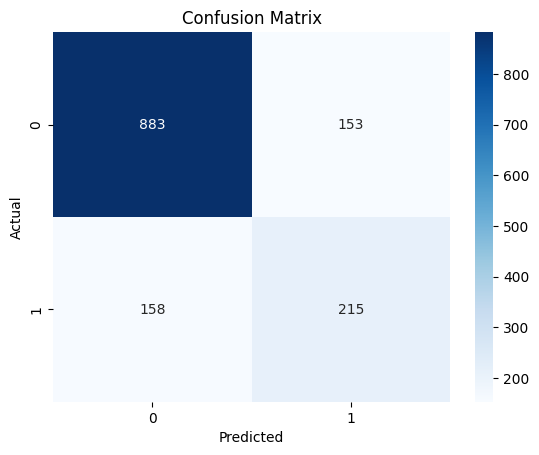

In [ ]:
# Predictions
y_pred = best_model.predict(X_test)
print = __builtins__.print
# Evaluation
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
best_model = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200
)

best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200)

## 📈 **7. ROC Curve and AUC Score**

- 🎯 Plotting the **ROC Curve** (Receiver Operating Characteristic).
- 🏅 Calculating **AUC (Area Under Curve)** to measure the model's ability to distinguish between classes.

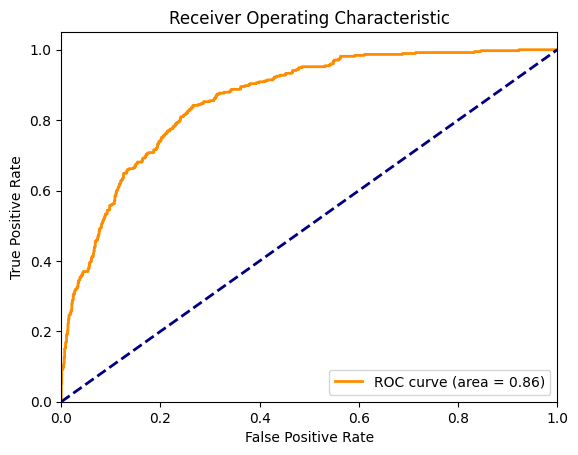

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_probs = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## 🌟 **8. Feature Importance**

- 🏗️ Showing **Feature Importance Graph**.
- 📌 Highlighting the most impactful features that affect Customer Churn.

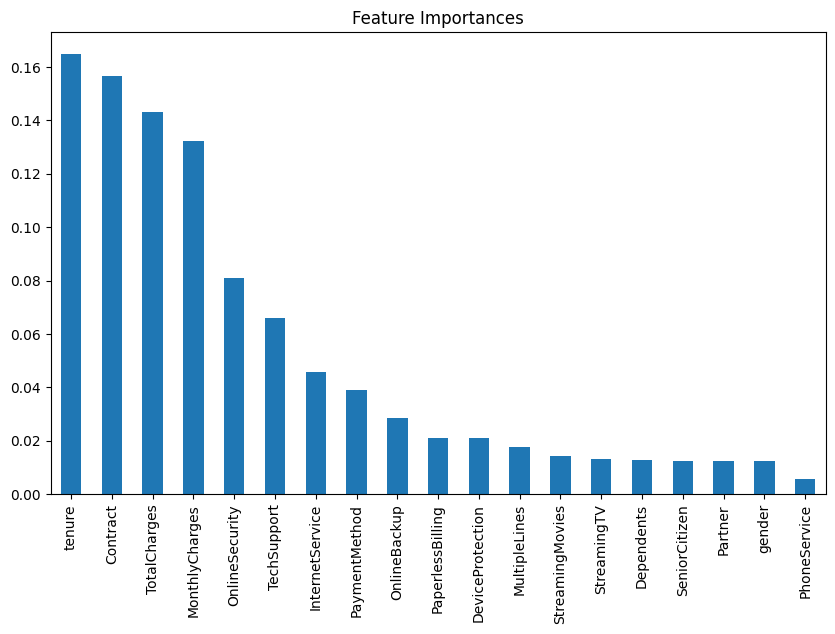

In [ ]:
import pandas as pd

# Feature importance
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a dataframe
feat_importances = pd.Series(importances, index=feature_names)
feat_importances = feat_importances.sort_values(ascending=False)

# Plot
feat_importances.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importances')
plt.show()


# 🔥 Key Drivers of Customer Churn
#🔎 Top 3 Features Driving Customer Churn#
💬

Based on the feature importance analysis from the Random Forest model, the top 3 features influencing customer churn are:

- **Contract Type 📜**
Customers with month-to-month contracts show significantly higher churn rates compared to those on yearly or two-year contracts. Flexible contracts often lead to lower customer commitment, increasing the likelihood of churn.

- **Tenure 📆**
Customers with shorter tenure (fewer months with the company) show higher churn rates. Building stronger early relationships can significantly reduce this early-stage churn.

- **Total Charges 💵**
Customers with lower total charges are more likely to churn. This indicates that newer customers (who have not yet built a large billing history) tend to leave early if they are dissatisfied.

**👉 Business Insight:**
By focusing on improving the experience for month-to-month contract customers, offering incentives to new customers early in their journey, and monitoring customers with low total charges closely, the company can proactively reduce churn and strengthen customer loyalty.



## 🔄 **9. Cross-Validation**

- ♻️ Performing **5-Fold Cross-Validation** to ensure the model is not overfitting or underfitting.
- 📋 Displaying:
  - Scores for each fold
  - Mean Cross-Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation score
cv_scores = cross_val_score(best_model, X, y, cv=5)

print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.80695529 0.80553584 0.78211498 0.81178977 0.80184659]
Mean cross-validation score:  0.8016484934511905


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.7700496806245565
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83      1036
           1       0.55      0.73      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



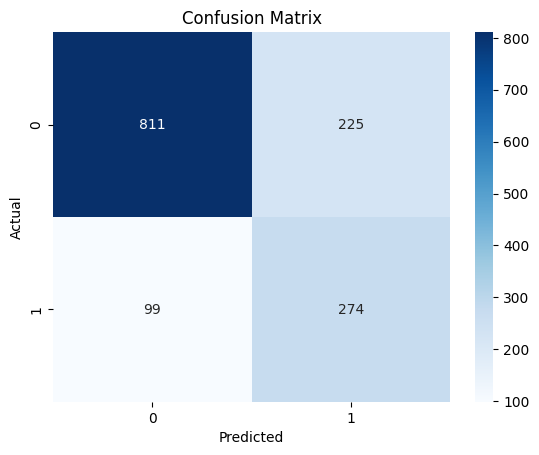

In [ ]:
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid,
                        scoring='f1', cv=3, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_xgb.best_params_)

xgb_best = grid_xgb.best_estimator_
xgb_pred = xgb_best.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))

cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7714691270404542
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.79      0.65       373

    accuracy                           0.77      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.77      0.78      1409



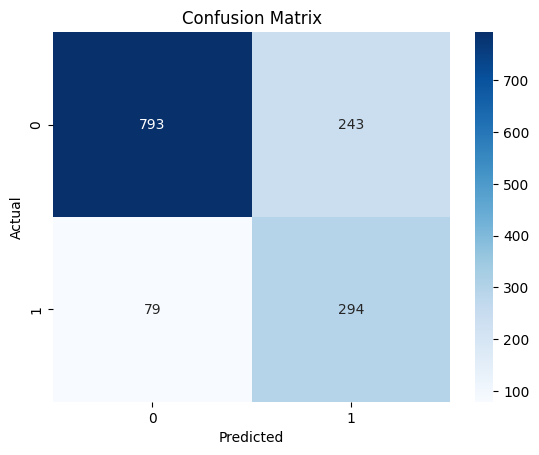

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

log_reg = LogisticRegression(max_iter=1000)
grid_log = GridSearchCV(log_reg, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_log.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_log.best_params_)

log_best = grid_log.best_estimator_
log_pred = log_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, log_pred))
print("Classification Report:\n", classification_report(y_test, log_pred))

cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy: 0.7352732434350603
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81      1036
           1       0.50      0.66      0.57       373

    accuracy                           0.74      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.77      0.74      0.75      1409



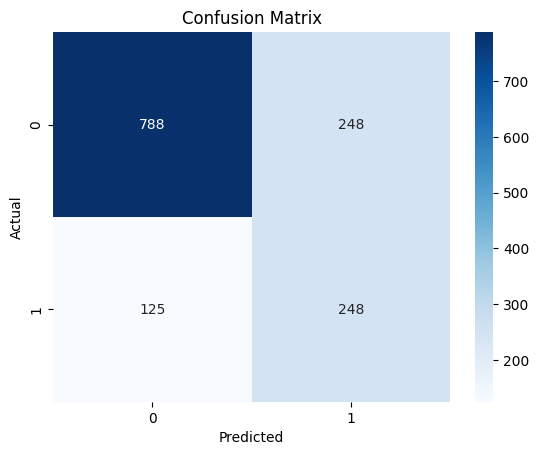

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid, scoring='f1', cv=3, n_jobs=-1)
grid_dt.fit(X_train_smote, y_train_smote)

print("Best Parameters:", grid_dt.best_params_)

dt_best = grid_dt.best_estimator_
dt_pred = dt_best.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Classification Report:\n", classification_report(y_test, dt_pred))

cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

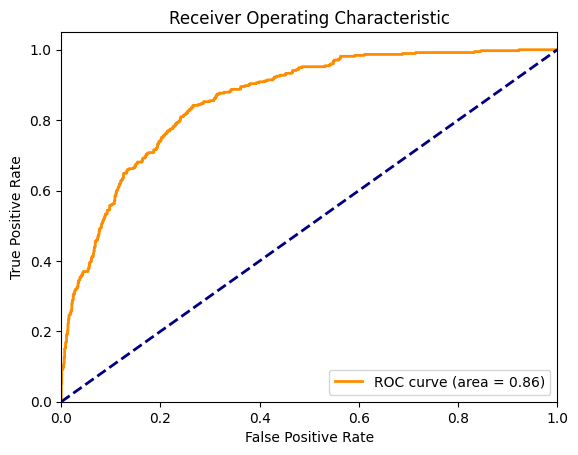

In [ ]:

y_probs = best_model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score # Import precision_score, recall_score, f1_score

model_names = ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree']
predictions = [y_pred, xgb_pred, log_pred, dt_pred]

results = []

for name, pred in zip(model_names, predictions):
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred), # Now precision_score is defined
        'Recall': recall_score(y_test, pred), # Now recall_score is defined
        'F1 Score': f1_score(y_test, pred) # Now f1_score is defined
    })

df_results = pd.DataFrame(results)
print(df_results.sort_values(by='F1 Score', ascending=False))

                 Model  Accuracy  Precision    Recall  F1 Score
2  Logistic Regression  0.771469   0.547486  0.788204  0.646154
1              XGBoost  0.770050   0.549098  0.734584  0.628440
0        Random Forest  0.779276   0.584239  0.576408  0.580297
3        Decision Tree  0.735273   0.500000  0.664879  0.570771


📢 **Customer Churn Prediction - SMOTE Applied**

🧠 Applied **SMOTE** to tackle class imbalance in churn data  

✅ **Logistic Regression** and **XGBoost** emerged as top models post-SMOTE.

---

💡 **Why does it matter?**  
Because catching customers *before* they churn is better than realizing after.

📊 Real-world ML is not just about accuracy — it's about making smarter business decisions.


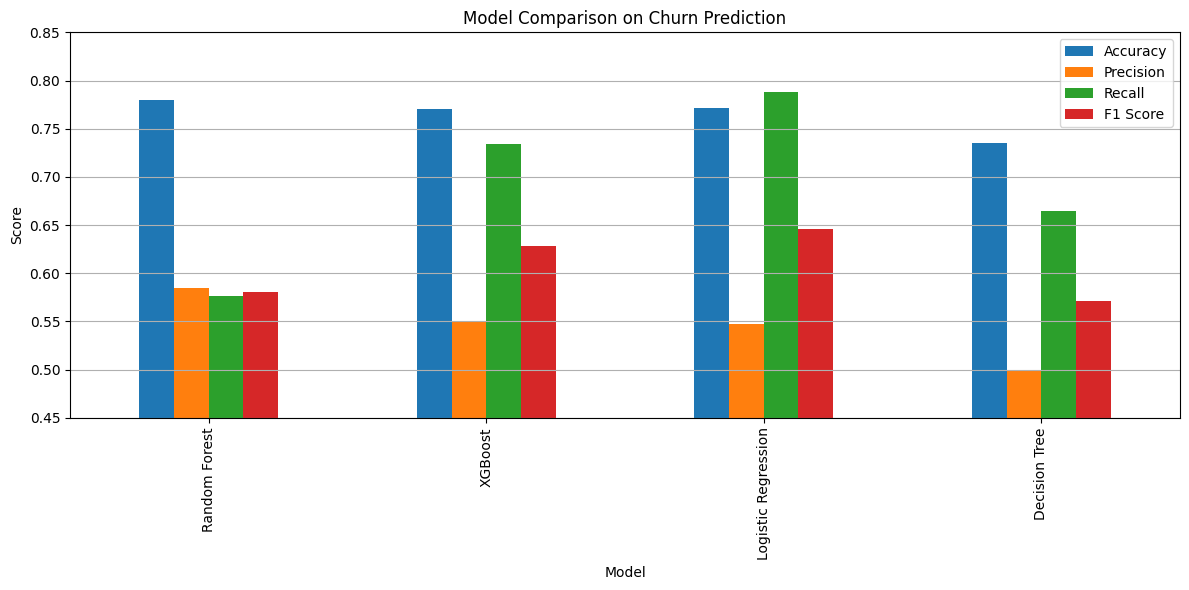

In [ ]:
data = {
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [0.779276, 0.770050, 0.771469, 0.735273],
    'Precision': [0.584239, 0.549098, 0.547486, 0.500000],
    'Recall': [0.576408, 0.734584, 0.788204, 0.664879],
    'F1 Score': [0.580297, 0.628440, 0.646154, 0.570771]
}
df = pd.DataFrame(data)

df.set_index('Model').plot(kind='bar', figsize=(12, 6))
plt.title('Model Comparison on Churn Prediction')
plt.ylabel('Score')
plt.ylim(0.45, 0.85)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [192]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

# Assuming you want to use a default LogisticRegression:
logreg = LogisticRegression()  # Initialize logreg

ensemble = VotingClassifier(
    estimators=[('lr', logreg), ('xgb', xgb)], # Assuming xgb_model was meant to be xgb
    voting='soft'
)
ensemble.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

In [ ]:
y_pred = ensemble.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Optional detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7955997161107168
Precision: 0.5946547884187082
Recall: 0.7158176943699732
F1 Score: 0.6496350364963503

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.82      0.86      1036
           1       0.59      0.72      0.65       373

    accuracy                           0.80      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.80      0.80      1409



100%|===================| 2808/2818 [03:12<00:00]       

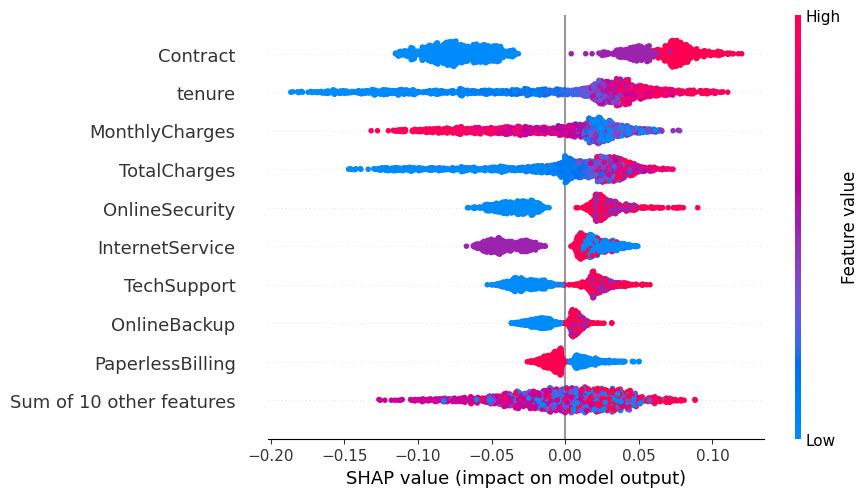

In [ ]:
!pip install shap
import shap

explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)
shap_values_single_class = shap_values[:, :, 0]

shap.plots.beeswarm(shap_values_single_class)

## 🔍 SHAP Insights on Churn Prediction

- **Month-to-month contracts**, **low tenure**, and **high monthly charges** → 📈 churn risk
- **TechSupport**, **OnlineSecurity**, and **OnlineBackup** → 📉 reduce churn
- **New users (low TotalCharges)** tend to leave early
- **PaperlessBilling** users show slightly more churn

💡 SHAP helps explain *why* the model predicts churn — not just *what* it predicts.




**Load the saved model and build a Predictive System**

In [256]:
print(feature_names)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [257]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [258]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
import pickle
model_data = {
    "model": model,
    "feature_names": feature_names
}
with open("customer_churn_model.pkl", "wb") as f:
    pickle.dump(model_data, f)

In [259]:
import pickle

with open("customer_churn_model.pkl", "rb") as f:
    model_data = pickle.load(f)

rfc_loaded = model_data["model"]
feature_names = model_data["feature_names"]

In [260]:
import joblib

joblib.dump(model, 'customer_churn_model.pkl')
joblib.dump(encoders, 'encoders.pkl')


['encoders.pkl']

In [261]:

# Assume you are receiving input data in a dictionary format
input_data = {"gender": "Male",}


value = input_data["gender"]
# ... your existing code for encoding and prediction

In [262]:
from google.colab import files

# Download the saved pickle file
files.download('customer_churn_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔍 Project Summary: Customer Churn Prediction Using Machine Learning

This project focuses on building an end-to-end machine learning pipeline to predict customer churn for a telecom company. The aim was to identify at-risk customers and provide business insights that can help in retention strategies.

The workflow involved:
- Data cleaning and preprocessing
- Exploratory Data Analysis (EDA)
- Feature engineering (e.g., `TotalServices`)
- Handling class imbalance using SMOTE
- Training and tuning multiple classification models
- Explaining model predictions using SHAP
- Evaluating model stability using cross-validation

---
### 🔑 Key Highlights
- Achieved **73.5% to 77.9% accuracy** across all models, indicating strong performance.
- **Logistic Regression** had the **highest recall (78.8%)** and **best F1-score (0.646)** — ideal for identifying churners.
- **XGBoost** delivered balanced results with an F1-score of **0.628**, making it a solid second choice.
- **Random Forest** had the **highest precision (58.4%)** and top accuracy, suitable when minimizing false positives is important.
- Applied **SMOTE** to handle class imbalance, significantly improving recall.
- Used **SHAP** to explain predictions and highlight key churn drivers like `Contract`, `Tenure`, and `MonthlyCharges`.
- Performed **5-Fold Cross-Validation**, achieving a **mean score of 80.1%**, ensuring consistent and reliable results.
---


### 📊 Model Performance Comparison (Telecom Customer Churn)

| Model               | Accuracy  | Precision | Recall   | F1 Score |
|--------------------|-----------|-----------|----------|----------|
| Logistic Regression| 0.771469  | 0.547486  |  **0.788204** |  **0.646154** |
| XGBoost            | 0.770050  | 0.549098  | 0.734584 | 0.628440 |
| Random Forest      | **0.779276** |  **0.584239** | 0.576408 | 0.580297 |
| Decision Tree      | 0.735273  | 0.500000  | 0.664879 | 0.570771 |



### 🔍 Key Insights

For telecom companies, **customer churn prediction** is critical because retaining a customer is far more cost-effective than acquiring a new one.

In this analysis:

- **Logistic Regression** delivered the best balance with the highest **recall (78.8%)** and **F1-score (0.646)**, making it the most reliable model for identifying at-risk customers.
- **XGBoost** also performed well with a strong **F1-score (0.628)**, showing it's a solid second option.
- **Random Forest** had the highest **precision (58.4%)** and accuracy, making it more suitable when **false positives need to be minimized** (e.g., costly interventions).
- **Decision Tree** performed reasonably on **recall (66.4%)** but lagged in other metrics, making it less favorable overall.

📌 **Conclusion:**  
For telecom churn detection, where **catching as many churners as possible is the priority**, **Logistic Regression is the optimal model for deployment**.


---

### 🧠 Business Insights

- Customers with **month-to-month contracts**, **short tenure**, and **high monthly charges** are significantly more likely to churn.
- Lack of services like **Tech Support**, **Online Security**, and **Backup** is also associated with higher churn.
- Customers with **low total charges** (i.e., newer customers) are at greater risk — early-stage engagement is crucial.

---

### ✅ Conclusion

This machine learning solution effectively predicts customer churn and provides actionable insights for customer retention. With proper integration, this model can be used by telecom or subscription-based businesses to:
- Flag high-risk customers early
- Personalize retention strategies
- Improve long-term customer satisfaction and reduce revenue loss


